# Gromacs - HECBioSim Benchmarks

Results from the [Gromacs](http://www.gromacs.org/) molecular dynamics code on 3x [HECBioSim](http://www.hecbiosim.ac.uk/benchmarks) benchmarks:
- 61K atom system - 1WDN Glutamine-Binding Protein
- 1.4M atom system - A Pair of hEGFR Dimers of 1IVO and 1NQL
- 3M atom system - A Pair of hEGFR tetramers of 1IVO and 1NQL

In [14]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

Each benchmark is run on a range of number of nodes, from 1 up to all available. Each run uses as many mpi tasks (processes) per node as there are physical cores, and the default Gromacs `-ntomp` OpenMP setting, which appears to add threads to use all cores (physical or logical). For further information on Gromacs parallelisation schemes see [here](http://www.gromacs.org/Documentation/Acceleration_and_parallelization) and [here](http://manual.gromacs.org/documentation/current/onlinehelp/gmx-mdrun.html#gmx-mdrun).

The plots show results for the most-recent run on each system/partition/environment combination. They show the wallclock time in seconds vs. the number of nodes used for each run. Lower values are better performance. 

Gromacs_61k_*: runtime_real


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,286.647,288.689
2,178.985,212.894
4,145.941,143.711
8,135.635,165.819
16,176.070,196.211


Gromacs_61k_*: ns_per_day


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,31.346,30.945
2,50.606,42.125
4,62.860,63.523
8,68.056,54.849
16,51.695,46.018


Gromacs_1400k_*: runtime_real


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,1111.355,1102.856
2,574.842,579.959
4,319.207,323.556
8,236.593,238.099
16,172.836,174.536


Gromacs_1400k_*: ns_per_day


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,1.572,1.582
2,3.069,3.041
4,5.637,5.557
8,7.678,7.612
16,10.734,10.574


Gromacs_3000k_*: runtime_real


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,2545.166,2563.048
2,1302.237,1299.122
4,666.695,669.401
8,407.404,422.673
16,267.932,276.715


Gromacs_3000k_*: ns_per_day


case,alaska:ib-gcc9-openmpi4-ucx,alaska:roce-gcc9-openmpi4-ucx
num_nodes,,
1,0.682,0.677
2,1.339,1.342
4,2.641,2.626
8,4.374,4.203
16,6.764,6.519


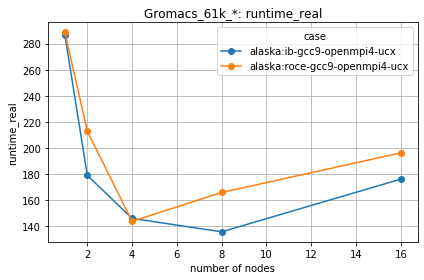

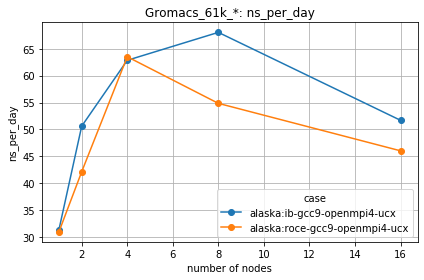

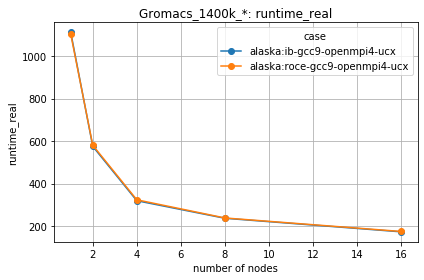

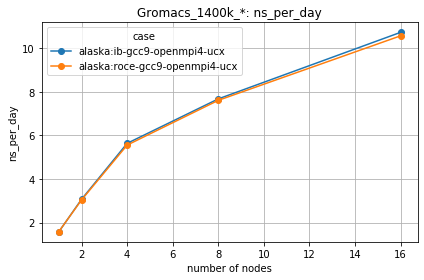

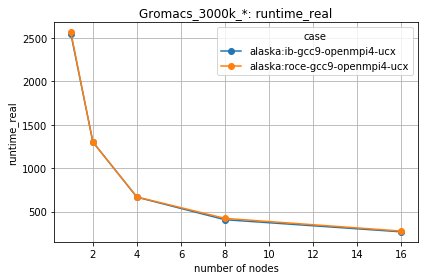

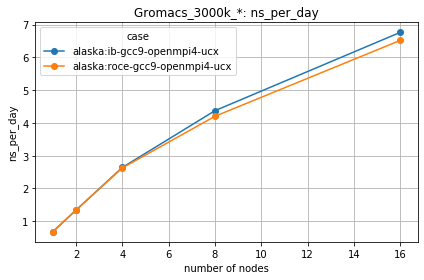

In [16]:
for test in ['Gromacs_61k_*', 'Gromacs_1400k_*', 'Gromacs_3000k_*']:
    for perf_var in ['runtime_real', 'ns_per_day']:
        df = modules.utils.tabulate_last_perf(test, 'num_nodes', perf_var)
        print('%s: %s' % (test, perf_var))
        display(HTML(df.to_html()))
        ax = df.plot(grid=True, style='o-')
        ax.set_xlabel('number of nodes')
        ax.set_ylabel(perf_var)
        ax.set_title('%s: %s' % (test, perf_var))
        plt.tight_layout()